# Document Results Before And After Applying Various Regularisation Techniques:


* ***Regularization techniques are used to reduce overfitting in the learning process***. Overfitting occurs when our model learns the input so much better that it could only further resolve the scenarios that seem similar to the input. It behaves very badly if something gets out of the scope of the input. Overfitting causes a lot of problems if we have our overfitted model in production. Let’s learn the techniques.



* One way to reduce overfitting is to reduce the number of parameters — that’s a conventional approach. Now, instead of reducing the number of parameters, we use all the parameters, but we penalize the non-required, unimportant parameters which do not affect the output. We penalize those parameters for being non-zero, for their existence — that’s an unconventional approach.



* One thing you should keep in mind is that regularization does not help in optimizing the cost function, it only helps in reducing the overfitting i.e. it is used to overcome the low bias & high variance behavior of our model.


<img src="https://i.ibb.co/g35FMM5/over.png"/>


* **Underfit Model. A model that fails to sufficiently learn the problem and performs poorly on a training dataset and does not perform well on a Validation dataset.**


* **Overfit Model. A model that learns the training dataset too well, performing well on the training dataset but does not perform well on a Validation dataset.**


* **Good Fit Model. A model that suitably learns the training dataset and generalizes well to the Validation dataset.**


* Have you seen this image before? As we move towards the right in this image, our model tries to learn too well the details and the noise from the training data, which ultimately results in poor performance on the unseen data.


* In other words, while going towards the right, the complexity of the model increases such that the training error reduces but the testing error doesn’t. This is shown in the image below.

<img src="https://miro.medium.com/max/700/1*3ddHBCP7wl2R4v5XPbltww.png"/>

* If you’ve built a neural network before, you know how complex they are. This makes them more prone to overfitting.



* Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well.



### How does Regularization help reduce Overfitting?

Let’s consider a neural network which is overfitting on the training data.



<img src="https://i.ibb.co/gmRzQtr/over-fitting.png"/>


* If you have studied the concept of regularization in machine learning, you will have a fair idea that regularization penalizes the coefficients. In deep learning, it actually penalizes the weight matrices of the nodes.


* Assume that our regularization coefficient is so high that some of the weight matrices are nearly equal to zero. This will result in a much simpler linear network and slight underfitting of the training data.


* Such a large value of the regularization coefficient is not that useful. We need to optimize the value of regularization coefficient in order to obtain a well-fitted model as shown in the image below.



<img src="https://i.ibb.co/CKBYWFK/under.png"/>


### Types of Regularisation Techniques:

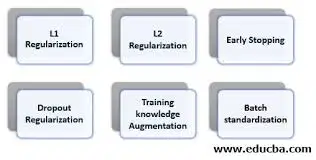



### L1 Norm Regularization (Weight Deacy)(Least Absolute Shrinkages & Selection Operator):


$$J_{n}(\theta ) = J_{0}(\theta )  + \lambda \sum_{i=1}^{m}\left \| w_{i} \right \| $$


$\lambda$ -> regularization parameter

$\lambda$ is 1 -> 100% regularization

$\lambda$ is 0 -> 0% regularization


drawback is modulus functiion si not differentiable completely




# Before Adding L1 Regularization

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
import mlxtend as ml
plt.style.use("fivethirtyeight")

In [2]:
(x_train_full,y_train_full),(x_test_full,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
x_train_val,x_train = x_train_full[0:4000]/255, x_train_full[4000:]/255
y_train_val,y_train = y_train_full[0:4000], y_train_full[4000:]
x_test_full = x_test_full /255

In [51]:
x_train_val[0].shape

(28, 28)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(200,activation="elu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [6]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [7]:
history = model.fit(x_train,y_train,batch_size=50,epochs=50,verbose=1,validation_data=(x_train_val,y_train_val))

Epoch 1/50
1120/1120 [==============================] - 13s 9ms/step - loss: 0.5328 - accuracy: 0.8102 - val_loss: 0.4311 - val_accuracy: 0.8407
Epoch 2/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.3862 - accuracy: 0.8591 - val_loss: 0.3759 - val_accuracy: 0.8640
Epoch 3/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.3487 - accuracy: 0.8721 - val_loss: 0.3478 - val_accuracy: 0.8752
Epoch 4/50
1120/1120 [==============================] - 11s 9ms/step - loss: 0.3238 - accuracy: 0.8801 - val_loss: 0.3493 - val_accuracy: 0.8708
Epoch 5/50
1120/1120 [==============================] - 11s 9ms/step - loss: 0.3098 - accuracy: 0.8842 - val_loss: 0.3403 - val_accuracy: 0.8765
Epoch 6/50
1120/1120 [==============================] - 11s 9ms/step - loss: 0.2943 - accuracy: 0.8900 - val_loss: 0.3302 - val_accuracy: 0.8815
Epoch 7/50
1120/1120 [==============================] - 9s 8ms/step - loss: 0.2821 - accuracy: 0.8955 - val_loss: 0.3357 - val_acc

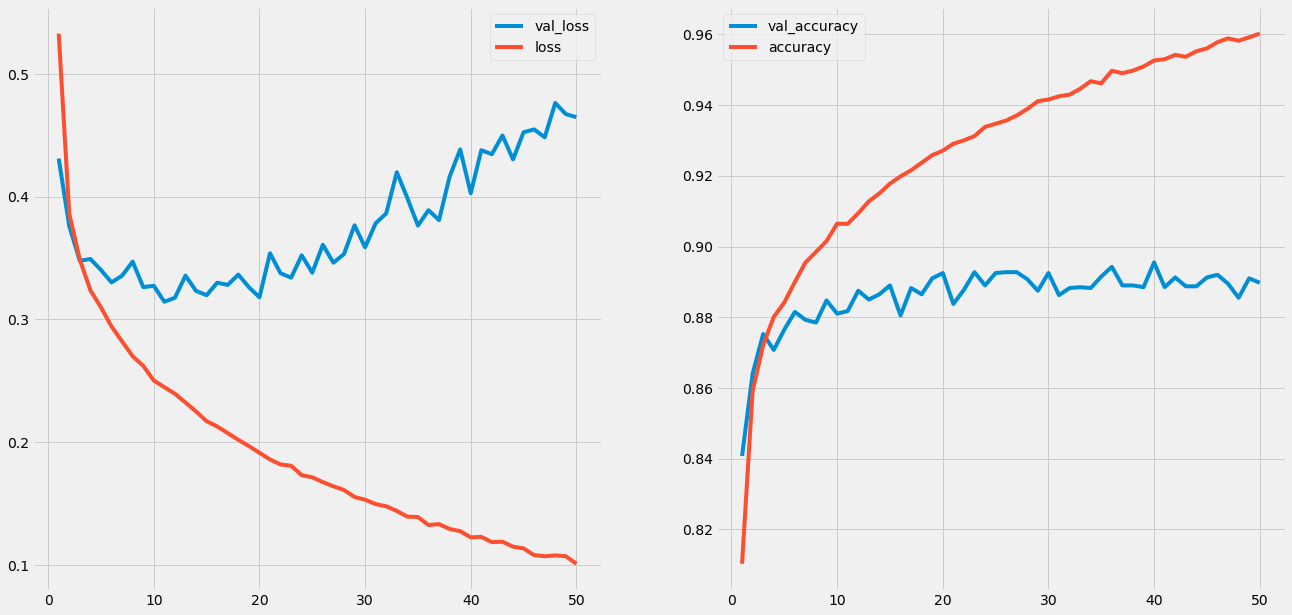

In [17]:
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(np.arange(1,51),history.history["val_loss"],label="val_loss")
plt.plot(np.arange(1,51),history.history["loss"],label="loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(1,51),history.history["val_accuracy"],label="val_accuracy")
plt.plot(np.arange(1,51),history.history["accuracy"],label="accuracy")
plt.legend()

In [18]:
model.evaluate(x_test_full,y_test,batch_size=50)

200/200 [==============================] - 1s 5ms/step - loss: 0.4795 - accuracy: 0.8870


[0.4795101583003998, 0.8870000243186951]

In [19]:
pre_ = model.predict(x_test_full)

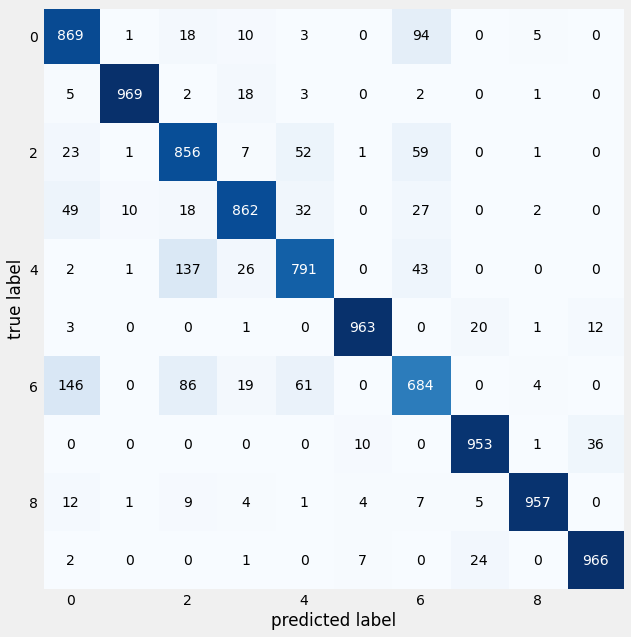

In [21]:
CM1 = confusion_matrix(y_test,np.argmax(pre_,axis=1))
fig, ax = plot_confusion_matrix(conf_mat=CM1 ,  figsize=(10, 10))
plt.show()

# After Adding L1 Regularization:

In [23]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model1.add(tf.keras.layers.Dense(100,activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model1.add(tf.keras.layers.Dense(200,activation="elu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model1.add(tf.keras.layers.Dense(100,activation="relu"))
model1.add(tf.keras.layers.Dense(10,activation="softmax", kernel_regularizer=tf.keras.regularizers.l1(0.001)))

In [24]:
model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [25]:
add_reg_history = model1.fit(x_train,y_train,batch_size=50,epochs=50,verbose=1,validation_data=(x_train_val,y_train_val))

Epoch 1/50
1120/1120 [==============================] - 13s 11ms/step - loss: 2.6810 - accuracy: 0.7516 - val_loss: 0.9355 - val_accuracy: 0.8027
Epoch 2/50
1120/1120 [==============================] - 12s 10ms/step - loss: 0.8661 - accuracy: 0.8092 - val_loss: 0.8259 - val_accuracy: 0.8145
Epoch 3/50
1120/1120 [==============================] - 11s 10ms/step - loss: 0.8006 - accuracy: 0.8192 - val_loss: 0.7865 - val_accuracy: 0.8217
Epoch 4/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.7720 - accuracy: 0.8211 - val_loss: 0.7689 - val_accuracy: 0.8248
Epoch 5/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.7556 - accuracy: 0.8220 - val_loss: 0.7378 - val_accuracy: 0.8280
Epoch 6/50
1120/1120 [==============================] - 11s 9ms/step - loss: 0.7458 - accuracy: 0.8246 - val_loss: 0.7607 - val_accuracy: 0.8202
Epoch 7/50
1120/1120 [==============================] - 11s 9ms/step - loss: 0.7364 - accuracy: 0.8256 - val_loss: 0.7428 - val

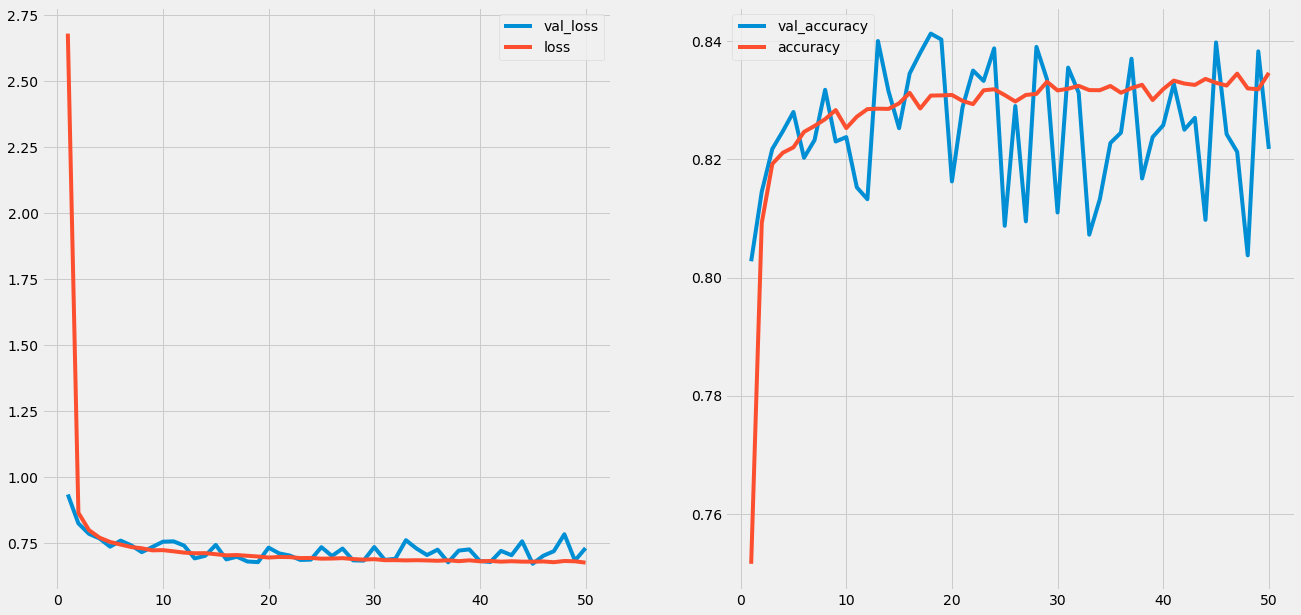

In [26]:
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(np.arange(1,51),add_reg_history.history["val_loss"],label="val_loss")
plt.plot(np.arange(1,51),add_reg_history.history["loss"],label="loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(1,51),add_reg_history.history["val_accuracy"],label="val_accuracy")
plt.plot(np.arange(1,51),add_reg_history.history["accuracy"],label="accuracy")
plt.legend()

In [27]:
model1.evaluate(x_test_full,y_test,batch_size=50)

200/200 [==============================] - 1s 5ms/step - loss: 0.7601 - accuracy: 0.8080


[0.760105550289154, 0.8080000281333923]

In [28]:
pre = model1.predict(x_test_full)

In [84]:
CMm = confusion_matrix(y_test,np.argmax(pre,axis=1))


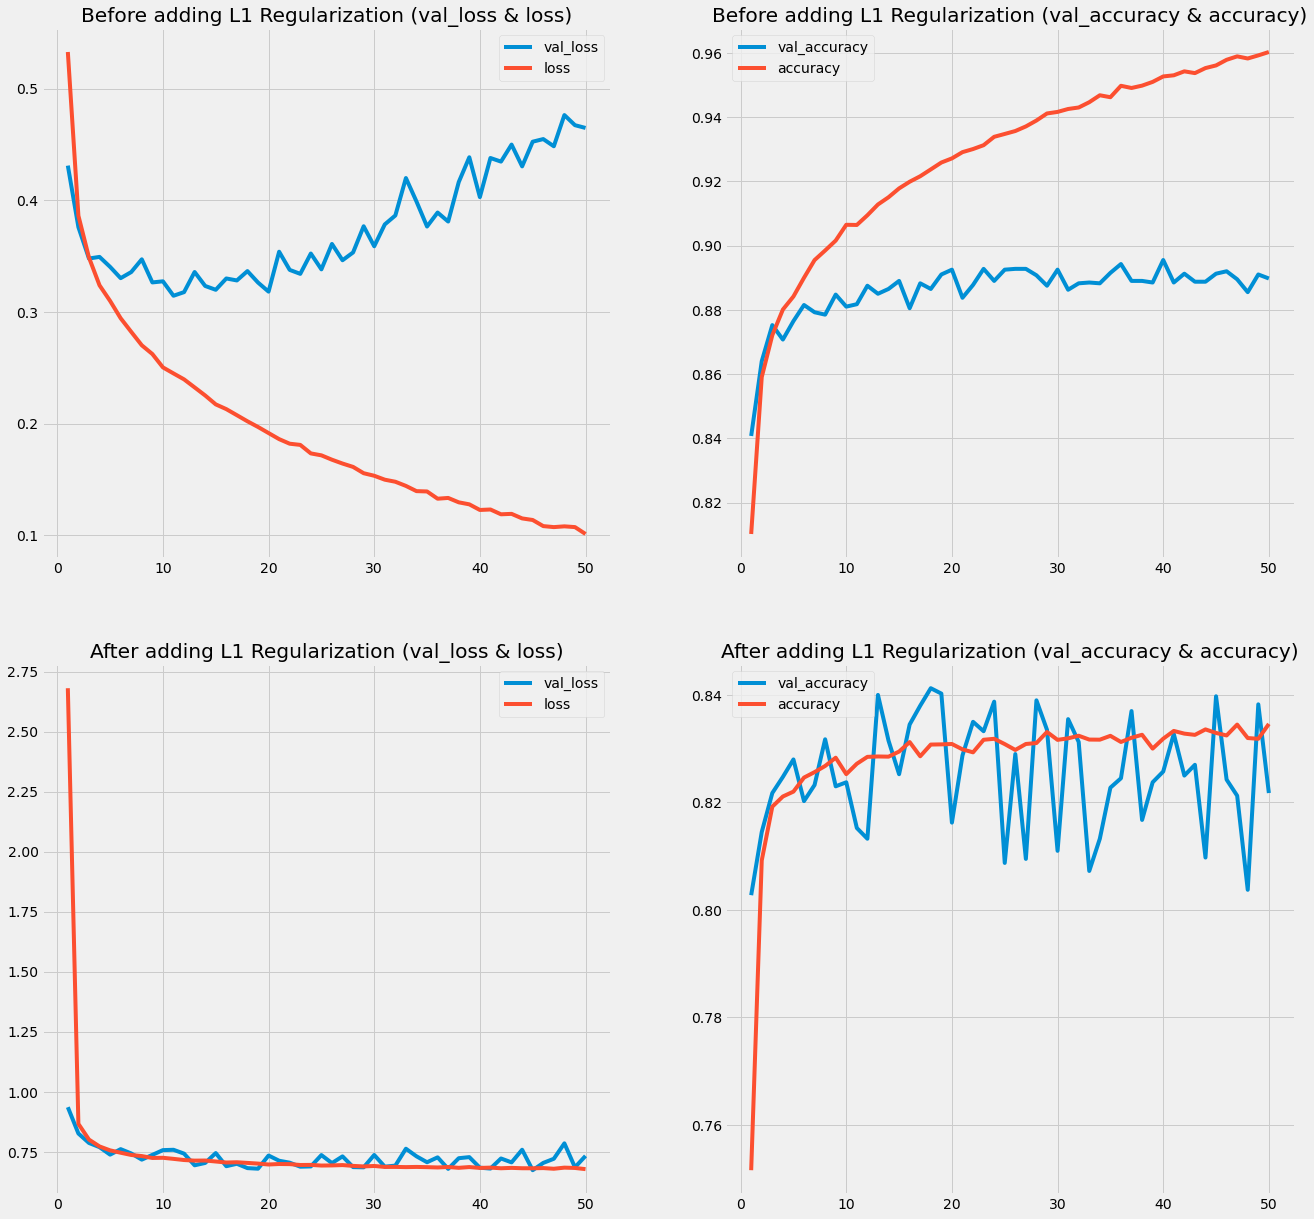

In [36]:
plt.subplots(figsize=(20,20))
plt.subplot(2,2,1)
plt.title("Before adding L1 Regularization (val_loss & loss)")
plt.plot(np.arange(1,51),history.history["val_loss"],label="val_loss")
plt.plot(np.arange(1,51),history.history["loss"],label="loss")
plt.legend()

plt.subplot(2,2,2)
plt.title("Before adding L1 Regularization (val_accuracy & accuracy)")
plt.plot(np.arange(1,51),history.history["val_accuracy"],label="val_accuracy")
plt.plot(np.arange(1,51),history.history["accuracy"],label="accuracy")
plt.legend()
plt.subplot(2,2,3)
plt.title("After adding L1 Regularization (val_loss & loss)")
plt.plot(np.arange(1,51),add_reg_history.history["val_loss"],label="val_loss")
plt.plot(np.arange(1,51),add_reg_history.history["loss"],label="loss")
plt.legend()

plt.subplot(2,2,4)
plt.title("After adding L1 Regularization (val_accuracy & accuracy)")
plt.plot(np.arange(1,51),add_reg_history.history["val_accuracy"],label="val_accuracy")
plt.plot(np.arange(1,51),add_reg_history.history["accuracy"],label="accuracy")
plt.legend()

Before Adding L1 Regularization
After Adding L1 Regularization


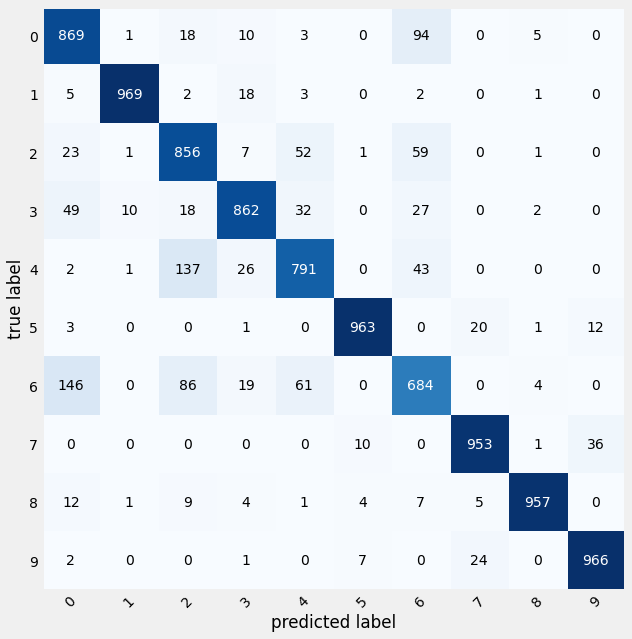

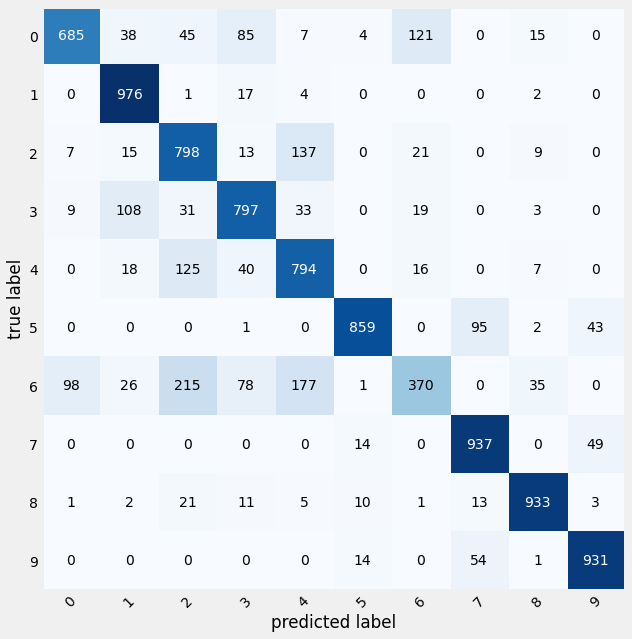

In [86]:
print("Before Adding L1 Regularization")
fig, ax = plot_confusion_matrix(conf_mat=CM1, figsize=(10,10), cmap='Blues',class_names=np.unique(y_test))
print("After Adding L1 Regularization")
fig,ax = plot_confusion_matrix(conf_mat=CMm, figsize=(10,10), cmap='Blues',class_names=np.unique(y_test))

### L2 Norm Regularization (Ridge):


$$J_{n}(\theta ) = J_{0}(\theta )  + \lambda \sum_{i=1}^{m}\left \| w_{i} \right \|^2 $$



* Here, lambda is the regularization parameter. It is the hyperparameter whose value is optimized for better results. L2 regularization is also known as weight decay as it forces the weights to decay towards zero (but not exactly zero).



* In this, we penalize the absolute value of the weights. Unlike L2, the weights may be reduced to zero here. Hence, it is very useful when we are trying to compress our model. Otherwise, we usually prefer L2 over it.



* kernel_regularizer acts on the weights, while bias_initializer acts on the bias and activity_regularizer acts on the y(layer output).



* We apply kernel_regularizer to penalize the weights which are very large causing the network to overfit, after applying kernel_regularizer the weights will become smaller.



* While we bias_regularizer to add a bias so that our bias approaches towards zero.



* Activity_regularizer tries to make the output smaller so as to remove overfitting.



# After Adding L2 Regularization: 

In [38]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model2.add(tf.keras.layers.Dense(100,activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model2.add(tf.keras.layers.Dense(200,activation="elu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model2.add(tf.keras.layers.Dense(100,activation="relu"))
model2.add(tf.keras.layers.Dense(10,activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001)))

In [39]:
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [40]:
add_reg_l2_history = model2.fit(x_train,y_train,batch_size=50,epochs=50,verbose=1,validation_data=(x_train_val,y_train_val))

Epoch 1/50
1120/1120 [==============================] - 12s 10ms/step - loss: 1.0806 - accuracy: 0.8022 - val_loss: 0.7143 - val_accuracy: 0.8250
Epoch 2/50
1120/1120 [==============================] - 11s 10ms/step - loss: 0.6154 - accuracy: 0.8477 - val_loss: 0.5760 - val_accuracy: 0.8562
Epoch 3/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.5561 - accuracy: 0.8572 - val_loss: 0.5368 - val_accuracy: 0.8553
Epoch 4/50
1120/1120 [==============================] - 12s 10ms/step - loss: 0.5195 - accuracy: 0.8629 - val_loss: 0.5043 - val_accuracy: 0.8660
Epoch 5/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.4959 - accuracy: 0.8675 - val_loss: 0.4912 - val_accuracy: 0.8648
Epoch 6/50
1120/1120 [==============================] - 9s 8ms/step - loss: 0.4815 - accuracy: 0.8697 - val_loss: 0.4753 - val_accuracy: 0.8712
Epoch 7/50
1120/1120 [==============================] - 9s 8ms/step - loss: 0.4729 - accuracy: 0.8703 - val_loss: 0.4779 - val_a

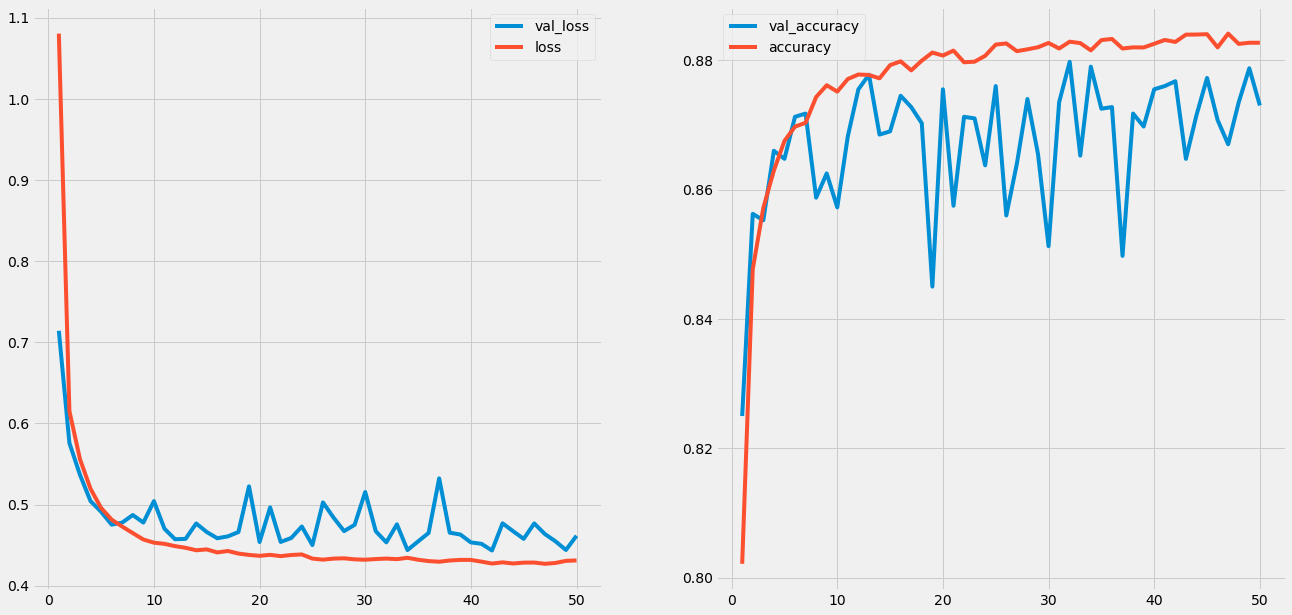

In [41]:
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(np.arange(1,51),add_reg_l2_history.history["val_loss"],label="val_loss")
plt.plot(np.arange(1,51),add_reg_l2_history.history["loss"],label="loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(1,51),add_reg_l2_history.history["val_accuracy"],label="val_accuracy")
plt.plot(np.arange(1,51),add_reg_l2_history.history["accuracy"],label="accuracy")
plt.legend()

In [42]:
model2.evaluate(x_test_full,y_test,batch_size=50)

200/200 [==============================] - 1s 5ms/step - loss: 0.4725 - accuracy: 0.8675


[0.47247591614723206, 0.8675000071525574]

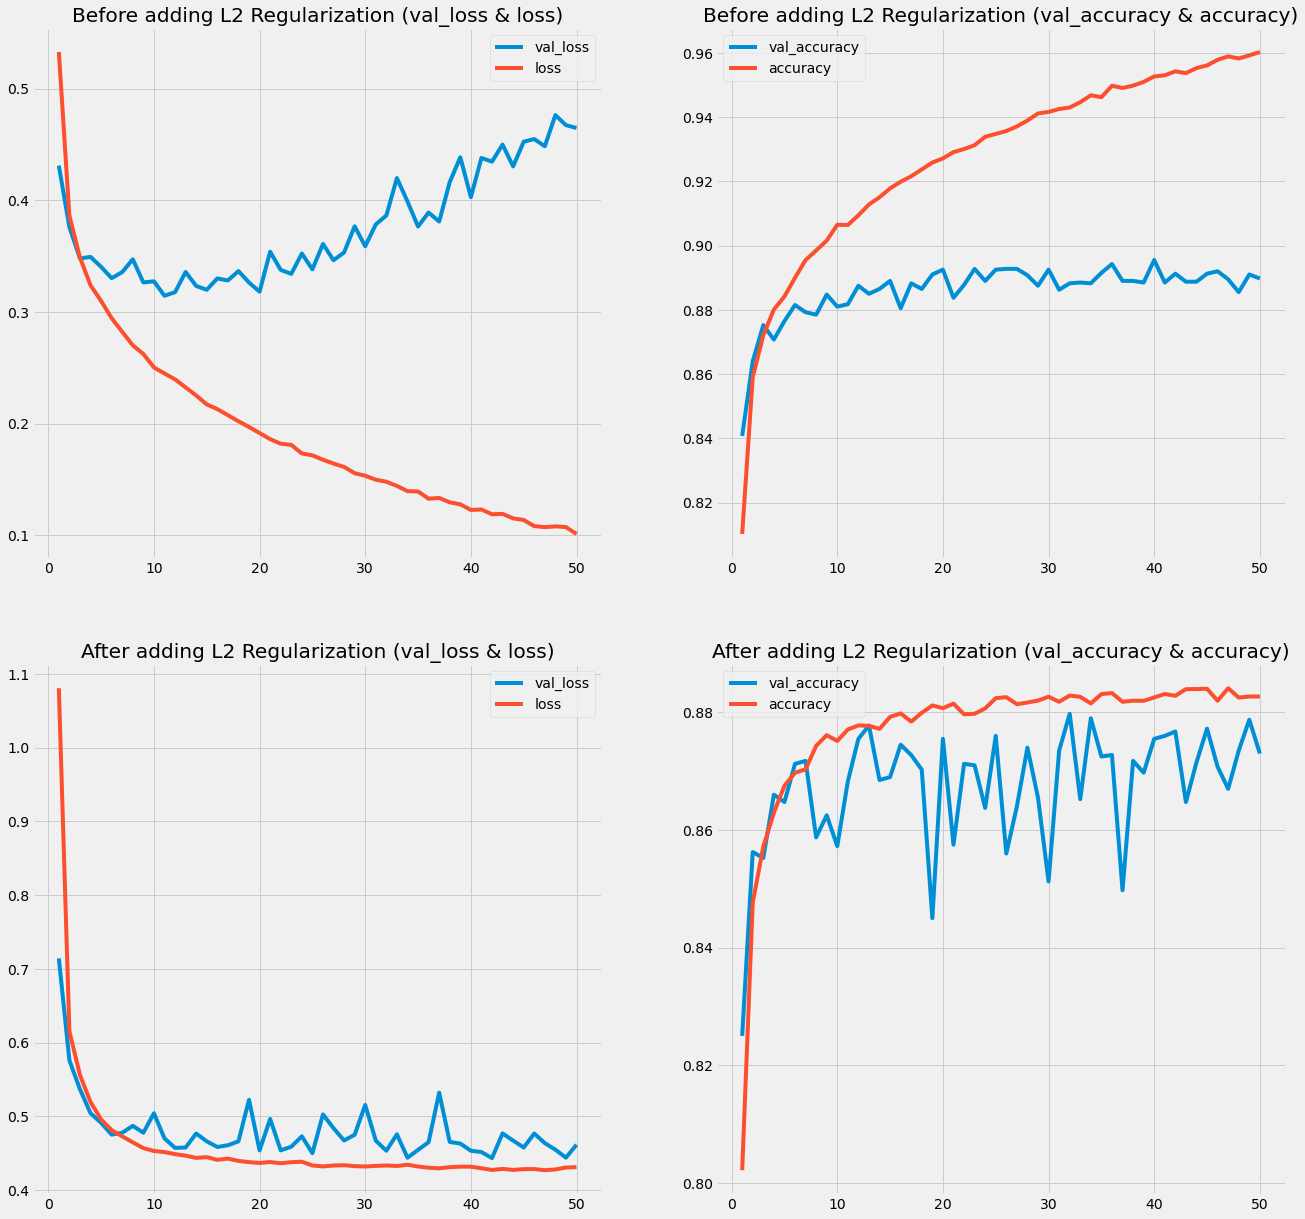

In [88]:
plt.subplots(figsize=(20,20))
plt.subplot(2,2,1)
plt.title("Before adding L2 Regularization (val_loss & loss)")
plt.plot(np.arange(1,51),history.history["val_loss"],label="val_loss")
plt.plot(np.arange(1,51),history.history["loss"],label="loss")
plt.legend()

plt.subplot(2,2,2)
plt.title("Before adding L2 Regularization (val_accuracy & accuracy)")
plt.plot(np.arange(1,51),history.history["val_accuracy"],label="val_accuracy")
plt.plot(np.arange(1,51),history.history["accuracy"],label="accuracy")
plt.legend()
plt.subplot(2,2,3)
plt.title("After adding L2 Regularization (val_loss & loss)")
plt.plot(np.arange(1,51),add_reg_l2_history.history["val_loss"],label="val_loss")
plt.plot(np.arange(1,51),add_reg_l2_history.history["loss"],label="loss")
plt.legend()

plt.subplot(2,2,4)
plt.title("After adding L2 Regularization (val_accuracy & accuracy)")
plt.plot(np.arange(1,51),add_reg_l2_history.history["val_accuracy"],label="val_accuracy")
plt.plot(np.arange(1,51),add_reg_l2_history.history["accuracy"],label="accuracy")
plt.legend()

In [43]:
pre2 = model2.predict(x_test_full)
CM_ = confusion_matrix(y_test,np.argmax(pre2,axis=1))

Before Adding L2 Regularization
After Adding L2 Regularization


(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

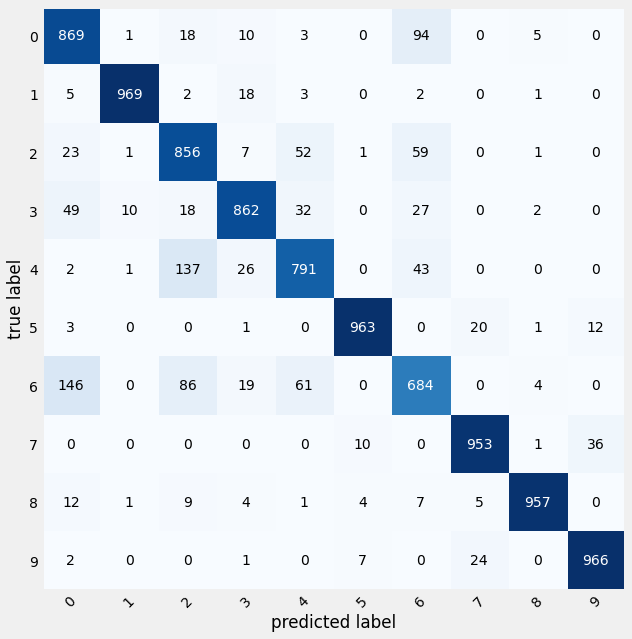

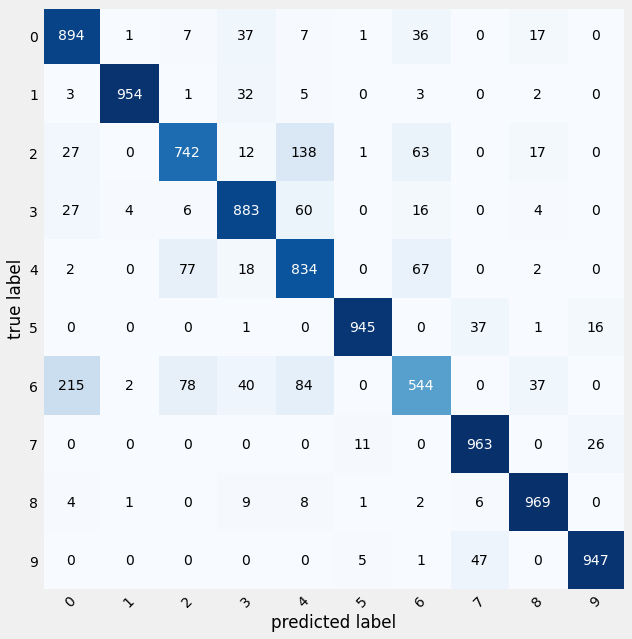

In [82]:
print("Before Adding L2 Regularization")
plot_confusion_matrix(conf_mat=CM1, figsize=(10,10), cmap='Blues',class_names=np.unique(y_test))
print("After Adding L2 Regularization")
plot_confusion_matrix(conf_mat=CM_, figsize=(10,10), cmap='Blues',class_names=np.unique(y_test))



# Combine L1 & L2 Regularization:

In [91]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model3.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model3.add(tf.keras.layers.Dense(200,activation="elu", kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model3.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'))
model3.add(tf.keras.layers.Dense(10,activation="softmax", kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))

In [96]:
model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [97]:
add_reg_l2_history = model3.fit(x_train,y_train,batch_size=50,epochs=50,verbose=1,validation_data=(x_train_val,y_train_val))

Epoch 1/50
1120/1120 [==============================] - 14s 10ms/step - loss: 3.8497 - accuracy: 0.7637 - val_loss: 0.9790 - val_accuracy: 0.8010
Epoch 2/50
1120/1120 [==============================] - 11s 10ms/step - loss: 0.9098 - accuracy: 0.8036 - val_loss: 0.8603 - val_accuracy: 0.8170
Epoch 3/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.8515 - accuracy: 0.8114 - val_loss: 0.8372 - val_accuracy: 0.8160
Epoch 4/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.8204 - accuracy: 0.8146 - val_loss: 0.8010 - val_accuracy: 0.8282
Epoch 5/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.8037 - accuracy: 0.8142 - val_loss: 0.8084 - val_accuracy: 0.8048
Epoch 6/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.7897 - accuracy: 0.8152 - val_loss: 0.7629 - val_accuracy: 0.8248
Epoch 7/50
1120/1120 [==============================] - 11s 10ms/step - loss: 0.7845 - accuracy: 0.8152 - val_loss: 0.7974 - val

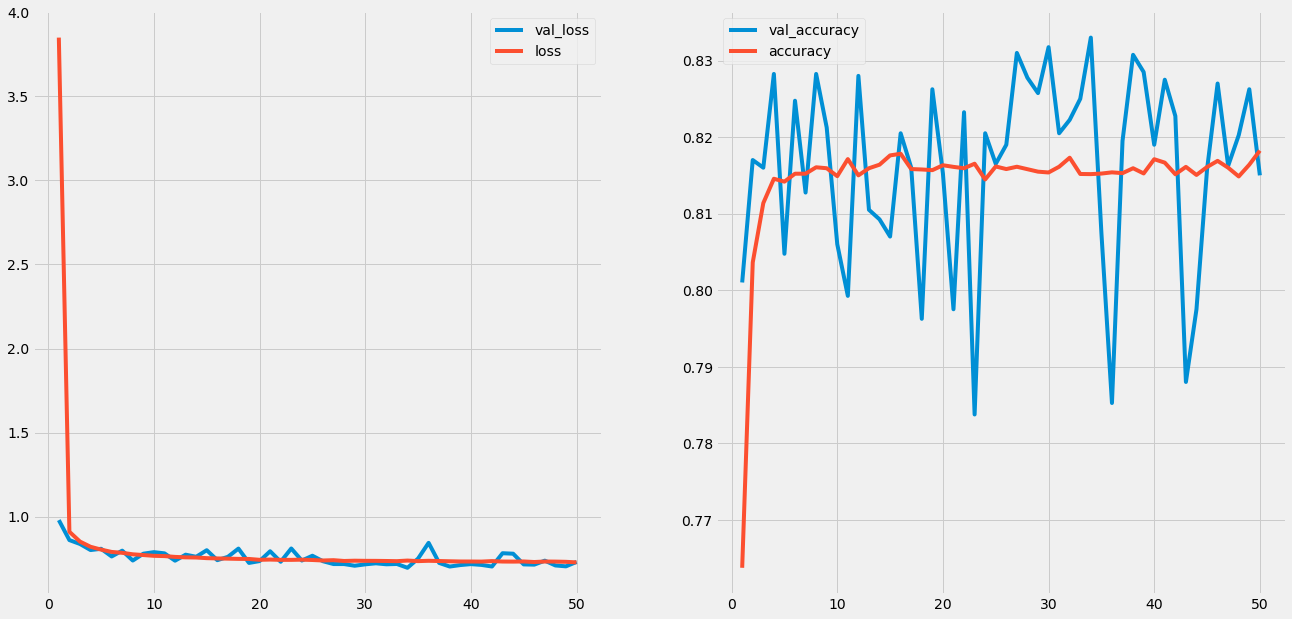

In [98]:
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(np.arange(1,51),add_reg_l2_history.history["val_loss"],label="val_loss")
plt.plot(np.arange(1,51),add_reg_l2_history.history["loss"],label="loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(1,51),add_reg_l2_history.history["val_accuracy"],label="val_accuracy")
plt.plot(np.arange(1,51),add_reg_l2_history.history["accuracy"],label="accuracy")
plt.legend()

In [99]:
model3.evaluate(x_test_full,y_test,batch_size=50)

200/200 [==============================] - 1s 6ms/step - loss: 0.7574 - accuracy: 0.8072


[0.75741046667099, 0.807200014591217]

In [100]:
CM_ = confusion_matrix(y_test,np.argmax(model2.predict(x_test_full),axis=1))

Before Adding L1&L2 Regularization
After Adding L1&L2 Regularization


(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

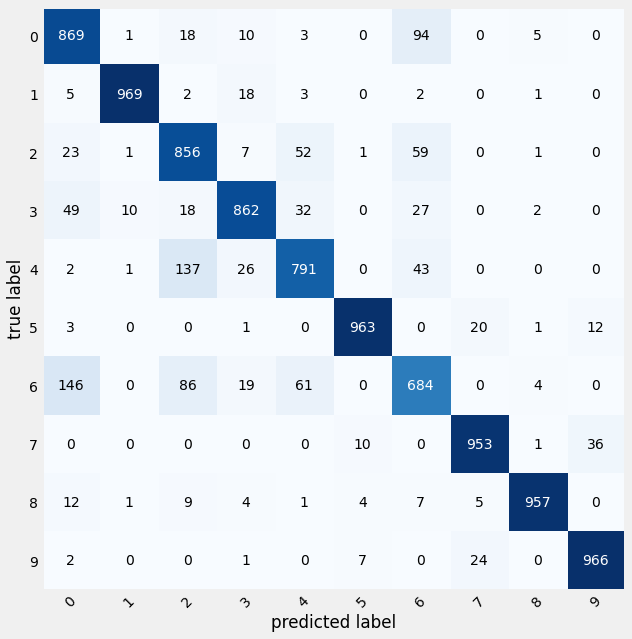

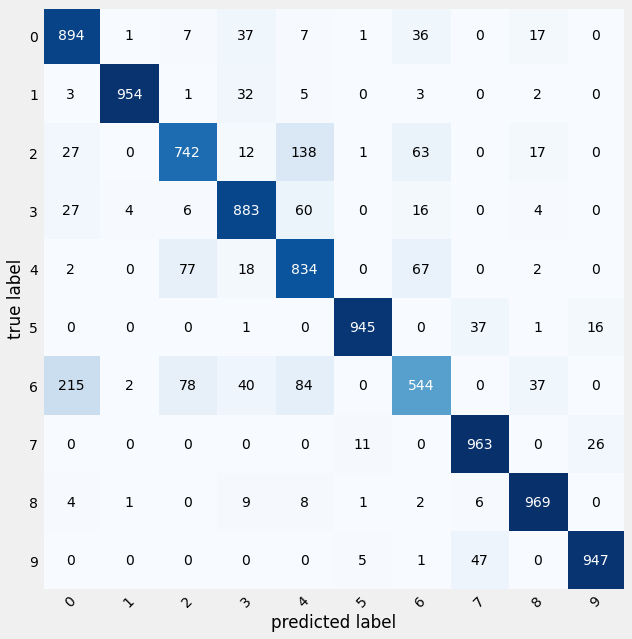

In [102]:
print("Before Adding L1&L2 Regularization")
plot_confusion_matrix(conf_mat=CM1, figsize=(10,10), cmap='Blues',class_names=np.unique(y_test))
print("After Adding L1&L2 Regularization")
plot_confusion_matrix(conf_mat=CM_, figsize=(10,10), cmap='Blues',class_names=np.unique(y_test))



# Dropout Techinques: 

* Dropout changed the concept of learning all the weights together to learning a fraction of the weights in the network in each training iteration.


* This issue resolved the overfitting issue in large networks. And suddenly bigger and more accurate Deep Learning architectures became possible


<img src="https://miro.medium.com/max/728/0*XGs7oF4W8f-rAEYZ.jpg"/>


### Formula Expression:

$$z_{i}^{(l+1)} = w_{i}^{(l+1)} y^{l} + b^{(l+1)}$$


$$y_{i} = f(z_{i}^{l+1})$$


$$r_{i}^{(l)}\sim Bernoulli(p)$$


$$\tilde{y^{(l)}} = r_{i}^{(l)} * y_{i}$$


$$z_{i}^{l+1} = w_{i}^{l+1} \tilde{y^{(l)}} + b^{l+1}$$



**Here ∗ denotes an element-wise product. For any layer l, $r^{(l)}$is a vector of independent Bernoulli random variables each of which has probability p of being 1. This vector is
sampled and multiplied element-wise with the outputs of that layer, $y^{(l)}$, to create thethinned outputs $\tilde{y}^{(l)}$.The thinned outputs are then used as input to the next layer. This
process is applied at each layer. This amounts to sampling a sub-network from a larger
network. For learning, the derivatives of the loss function are backpropagated through the
sub-network. At test time, the weights are scaled as $W^{(l)}$ test = p * $W^{(l)}$.
The resulting neural network is used without dropout.***
<img src="https://miro.medium.com/max/700/1*96mSeI7_OPsPxFG702LYrg.png"/>


<img src="https://miro.medium.com/max/3280/1*pJhVBQsO9YSh0DGqwWWo7Q.png"/>


* Before Dropout, a major research area was regularization. Introduction of regularization methods in neural networks, such as L1 and L2 weight penalties, started from the early 2000s [1]. However, these regularizations did not completely solve the overfitting issue.

**The reason was Co-adaptation**


### Co-adaptation in Neural Network:


<img src="https://miro.medium.com/max/1400/1*KNNda69A2fc_Lt3vrMBpdg.png"/>

<center>Co-adaption of node connections in a Neural Network</center>

* One major issue in learning large networks is co-adaptation. In such a network, if all the weights are learned together it is common that some of the connections will have more predictive capability than the others.


* In such a scenario, as the network is trained iteratively these powerful connections are learned more while the weaker ones are ignored. Over many iterations, only a fraction of the node connections is trained. And the rest stop participating.



* This phenomenon is called co-adaptation. This could not be prevented with the traditional regularization, like the L1 and L2. The reason is they also regularize based on the predictive capability of the connections. Due to this, they become close to deterministic in choosing and rejecting weights. And, thus again, the strong gets stronger and the weak gets weaker.


* A major fallout of this was: expanding the neural network size would not help. Consequently, neural networks’ size and, thus, accuracy became limited.


* Then came Dropout. A new regularization approach. It resolved the co-adaptation. Now, we could build deeper and wider networks. And use the prediction power of all of it.


<img src="http://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif"/>

In [9]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model4.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'))
model4.add(tf.keras.layers.Dropout(0.5))           
model4.add(tf.keras.layers.Dense(200,activation="elu", kernel_initializer='he_normal'))
model4.add(tf.keras.layers.Dropout(0.5))
model4.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'))
model4.add(tf.keras.layers.Dropout(0.5))
model4.add(tf.keras.layers.Dense(10,activation="softmax"))

In [10]:
model4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [11]:
add_reg_l2_history = model4.fit(x_train,y_train,batch_size=50,epochs=50,verbose=1,validation_data=(x_train_val,y_train_val))

Epoch 1/50
1120/1120 [==============================] - 21s 12ms/step - loss: 1.0412 - accuracy: 0.5988 - val_loss: 0.5918 - val_accuracy: 0.7870
Epoch 2/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.7940 - accuracy: 0.6968 - val_loss: 0.5576 - val_accuracy: 0.7940
Epoch 3/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.7359 - accuracy: 0.7216 - val_loss: 0.5216 - val_accuracy: 0.8023
Epoch 4/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.6951 - accuracy: 0.7331 - val_loss: 0.5121 - val_accuracy: 0.8140
Epoch 5/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.6680 - accuracy: 0.7426 - val_loss: 0.5145 - val_accuracy: 0.8070
Epoch 6/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.6475 - accuracy: 0.7495 - val_loss: 0.4741 - val_accuracy: 0.8313
Epoch 7/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.6283 - accuracy: 0.7645 - val_loss: 0.4591 - val_a

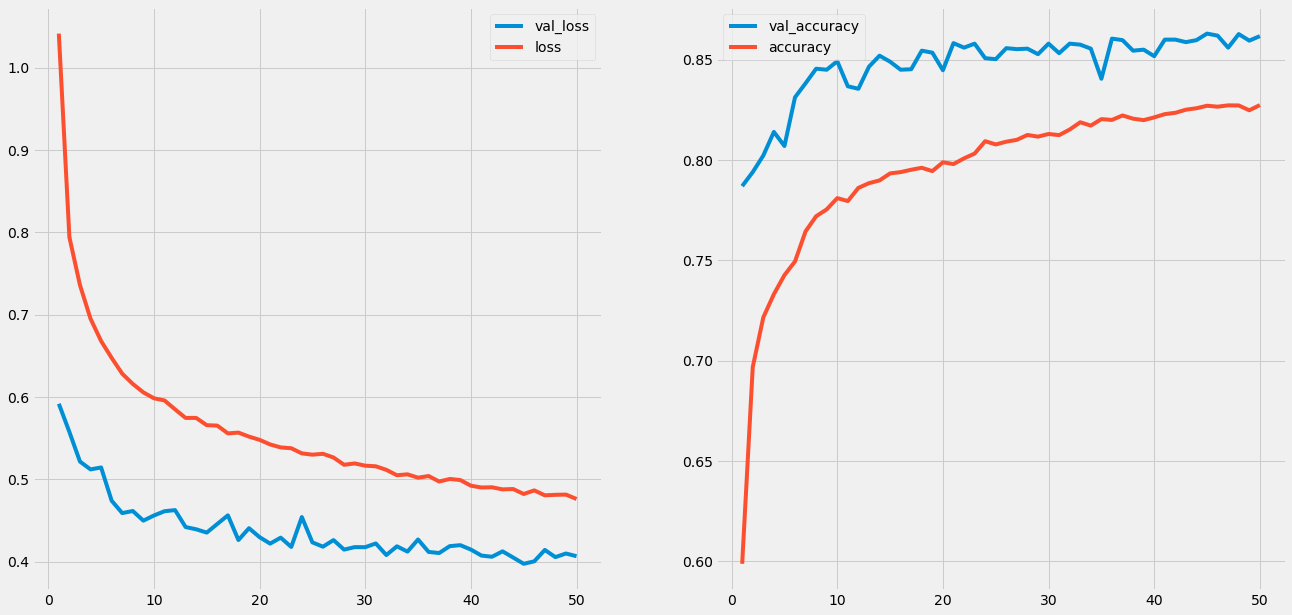

In [12]:
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(np.arange(1,51),add_reg_l2_history.history["val_loss"],label="val_loss")
plt.plot(np.arange(1,51),add_reg_l2_history.history["loss"],label="loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(1,51),add_reg_l2_history.history["val_accuracy"],label="val_accuracy")
plt.plot(np.arange(1,51),add_reg_l2_history.history["accuracy"],label="accuracy")
plt.legend()

## Observation:

* dropout layer is better performance the previous L1 & L2 Regularization.


* It also reduce Co-adapation given nodes in neural network

## GaussianDropout:

In [6]:
model4_gass = tf.keras.models.Sequential()
model4_gass.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model4_gass.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'))
model4_gass.add(tf.keras.layers.GaussianDropout(0.5))           
model4_gass.add(tf.keras.layers.Dense(200,activation="elu", kernel_initializer='he_normal'))
model4_gass.add(tf.keras.layers.GaussianDropout(0.5))
model4_gass.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'))
model4_gass.add(tf.keras.layers.GaussianDropout(0.5))
model4_gass.add(tf.keras.layers.Dense(10,activation="softmax"))

In [7]:
model4_gass.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [8]:
add_reg_drop_gass_history = model4_gass.fit(x_train,y_train,batch_size=50,epochs=50,verbose=1,validation_data=(x_train_val,y_train_val))

Epoch 1/50
1120/1120 [==============================] - 14s 10ms/step - loss: 1.0644 - accuracy: 0.6111 - val_loss: 0.5834 - val_accuracy: 0.7855
Epoch 2/50
1120/1120 [==============================] - 10s 9ms/step - loss: 0.8074 - accuracy: 0.7072 - val_loss: 0.5375 - val_accuracy: 0.8040
Epoch 3/50
1120/1120 [==============================] - 11s 10ms/step - loss: 0.7492 - accuracy: 0.7340 - val_loss: 0.5305 - val_accuracy: 0.8140
Epoch 4/50
1120/1120 [==============================] - 11s 10ms/step - loss: 0.7099 - accuracy: 0.7539 - val_loss: 0.5309 - val_accuracy: 0.8257
Epoch 5/50
1120/1120 [==============================] - 11s 10ms/step - loss: 0.6798 - accuracy: 0.7665 - val_loss: 0.4827 - val_accuracy: 0.8347
Epoch 6/50
1120/1120 [==============================] - 11s 10ms/step - loss: 0.6637 - accuracy: 0.7742 - val_loss: 0.5016 - val_accuracy: 0.8250
Epoch 7/50
1120/1120 [==============================] - 11s 10ms/step - loss: 0.6465 - accuracy: 0.7837 - val_loss: 0.4853 - 

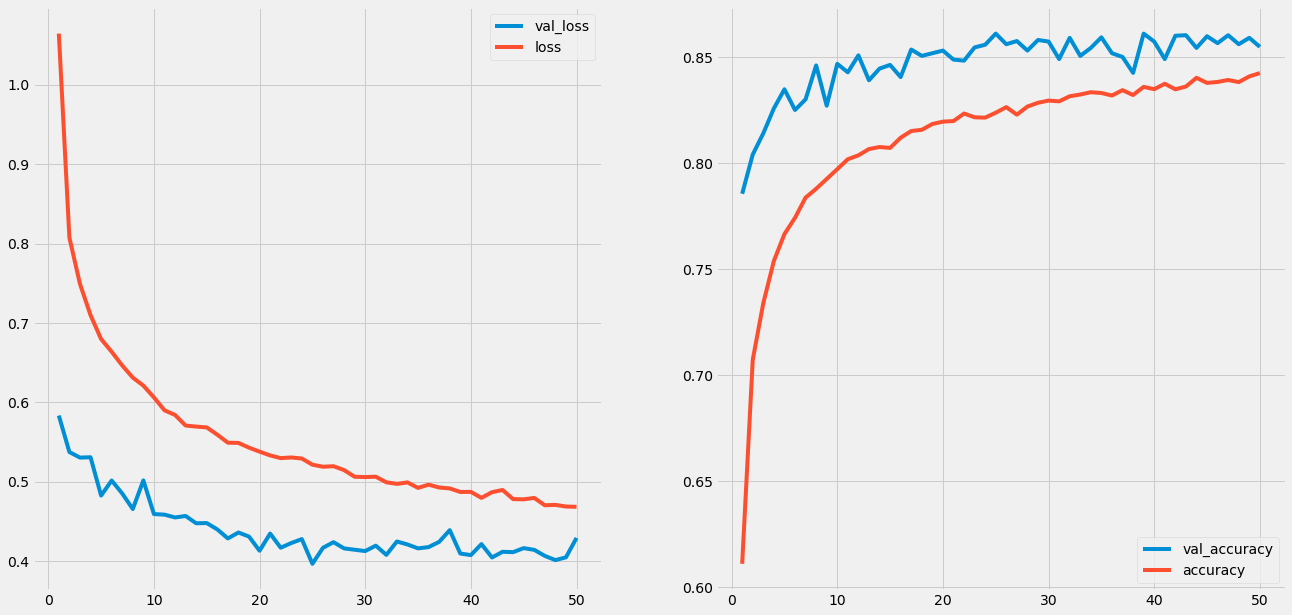

In [9]:
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(np.arange(1,51),add_reg_drop_gass_history.history["val_loss"],label="val_loss")
plt.plot(np.arange(1,51),add_reg_drop_gass_history.history["loss"],label="loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(1,51),add_reg_drop_gass_history.history["val_accuracy"],label="val_accuracy")
plt.plot(np.arange(1,51),add_reg_drop_gass_history.history["accuracy"],label="accuracy")
plt.legend()

## Observation:

* Gaussain dropout is better than dropout layers because converging faster and generalizes the model

In [24]:
model4_gass_noise = tf.keras.models.Sequential()
model4_gass_noise.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model4_gass.add(tf.keras.layers.GaussianNoise(0.1))           
model4_gass_noise.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'))
model4_gass.add(tf.keras.layers.GaussianDropout(0.5))           
model4_gass_noise.add(tf.keras.layers.Dense(200,activation="elu", kernel_initializer='he_normal'))
model4_gass_noise.add(tf.keras.layers.GaussianDropout(0.5))
model4_gass_noise.add(tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'))
model4_gass_noise.add(tf.keras.layers.GaussianDropout(0.5))
model4_gass_noise.add(tf.keras.layers.Dense(10,activation="softmax"))

In [25]:
model4_gass_noise.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [26]:
add_reg_drop_gass_noise_history = model4_gass_noise.fit(x_train,y_train,batch_size=50,epochs=50,verbose=1,validation_data=(x_train_val,y_train_val))

Epoch 1/50
1120/1120 [==============================] - 12s 10ms/step - loss: 0.6854 - accuracy: 0.7590 - val_loss: 0.4229 - val_accuracy: 0.8525
Epoch 2/50
1120/1120 [==============================] - 11s 10ms/step - loss: 0.4818 - accuracy: 0.8330 - val_loss: 0.4177 - val_accuracy: 0.8518
Epoch 3/50
1120/1120 [==============================] - 9s 8ms/step - loss: 0.4414 - accuracy: 0.8471 - val_loss: 0.4024 - val_accuracy: 0.8520
Epoch 4/50
1120/1120 [==============================] - 11s 9ms/step - loss: 0.4139 - accuracy: 0.8561 - val_loss: 0.3985 - val_accuracy: 0.8533
Epoch 5/50
1120/1120 [==============================] - 9s 8ms/step - loss: 0.3964 - accuracy: 0.8606 - val_loss: 0.4230 - val_accuracy: 0.8512
Epoch 6/50
1120/1120 [==============================] - 9s 8ms/step - loss: 0.3810 - accuracy: 0.8652 - val_loss: 0.3683 - val_accuracy: 0.8702
Epoch 7/50
1120/1120 [==============================] - 8s 7ms/step - loss: 0.3735 - accuracy: 0.8693 - val_loss: 0.3722 - val_accu

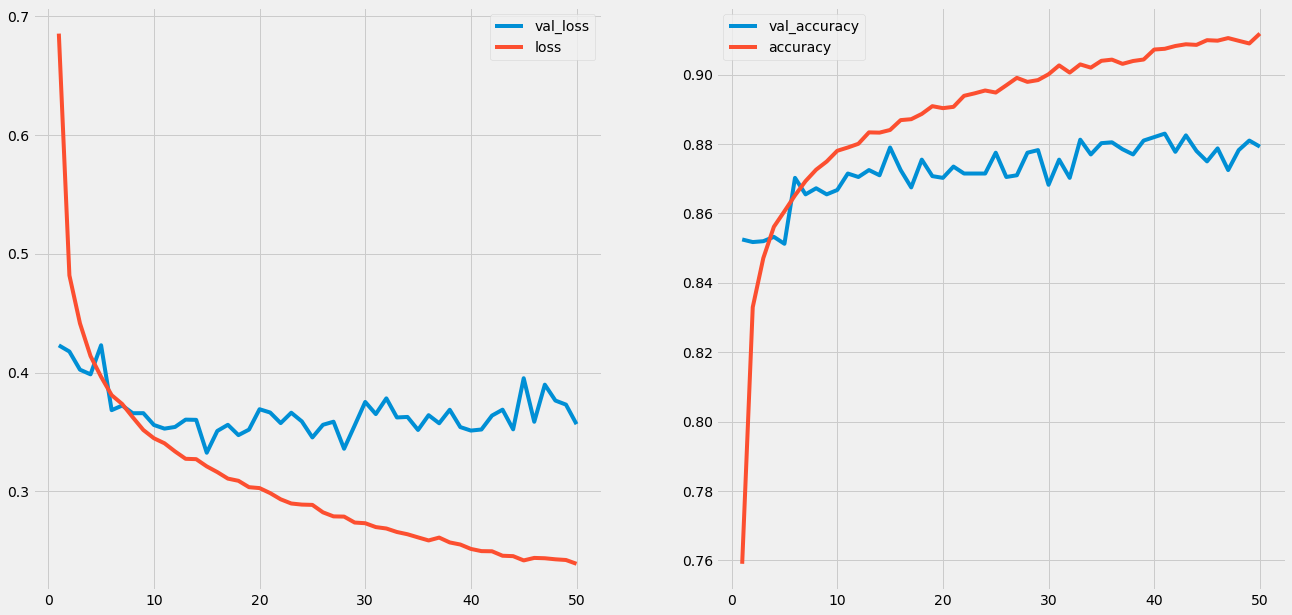

In [27]:
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(np.arange(1,51),add_reg_drop_gass_noise_history.history["val_loss"],label="val_loss")
plt.plot(np.arange(1,51),add_reg_drop_gass_noise_history.history["loss"],label="loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(1,51),add_reg_drop_gass_noise_history.history["val_accuracy"],label="val_accuracy")
plt.plot(np.arange(1,51),add_reg_drop_gass_noise_history.history["accuracy"],label="accuracy")
plt.legend()

See this graph given above,this is slightly generalizes  model, So gaussian noise not full Fetched generalizes  model

### Early stopping:


* It is a kind of cross-validation strategy where one part of the training set is used as a validation set, and the performance of the model is gauged against this set. So if the performance on this validation set gets worse, the training on the model is immediately stopped.


* The main idea behind this technique is that while fitting a neural network on training data, consecutively, the model is evaluated on the unseen data or the validation set after each iteration. So if the performance on this validation set is decreasing or remaining the same for the certain iterations, then the process of model training is stopped.


### Data Augmentation:


* The simplest way to reduce overfitting is to increase the data, and this technique helps in doing so.


* Data augmentation is a regularization technique, which is used generally when we have images as data sets. It generates additional data artificially from the existing training data by making minor changes such as rotation, flipping, cropping, or blurring a few pixels in the image, and this process generates more and more data. Through this regularization technique, the model variance is reduced, which in turn decreases the regularization error.


* The regularization is a technique used to reduce the overfitting in the model. unnecessarily. In dealing with deep learning models, too much learning is also bad for the model to make a prediction with unseen data. If we get good results in training data and poor results in unseen data (test data, validation data) then it is framed as an overfitting problem. So now using data augmentation, we perform few transformations to the data like flipping, cropping, adding noise to the data, etc. 


* As you know, deep learning models are data hungry, if we are lacking data then by using data augmentation transformations of the image we can generate data. Data augmentation is a preprocessing technique because we only work on the data to train our model. In this technique, we generate new instances of images by cropping, flipping, zooming, shearing an original image. So, whenever the training lacks the image dataset, using augmentation, we can create thousands of images to train the model perfectly.
### Batch Normalization:


* Batch Normalization is another important regularization technique that helps a lot, preventing overfitting and training in the right order.